In [1]:
# COMPARE 2 IMAGES
# Imagenet - original pretrained neural network designed in 2010
# Densenet - CNN architecture that is known for its efficiency and accuracy in image classification tasks.
# Softmax - an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v ) with probabilities of each possible outcome.

In [ ]:
# Install libraries
!pip install torch torchvision Pillow

In [4]:
# Import required libraries
import cv2
import numpy as np
import torch
from torchvision import transforms,models
from PIL import Image
import matplotlib.pyplot as plt

In [38]:
# Download Pretrained model ImageNet Classes
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-12-29 11:56:34--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-12-29 11:56:35 (63.2 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



In [11]:
# Read Image 1
input1=Image.open("input1.jpg")

In [48]:
img1 = cv2.imread("input1.jpg") # image format YUV (or YCbCR)
Y1 = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)[:,:,0] # intesity
# compute min and max of Y
min1 = np.min(Y1)
max1 = np.max(Y1)
# compute contrast ( between 0 and 1 )
contrast1 = (max1-min1)/(max1+min1)

In [22]:
# Read Image 2
input2=Image.open("input2.jpg")

In [49]:
img2 = cv2.imread("input2.jpg") # image format YUV (or YCbCR)
Y2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YUV)[:,:,0] # intesity
# compute min and max of Y
min2 = np.min(Y2)
max2 = np.max(Y2)
# compute contrast ( between 0 and 1 )
contrast2 = (max2-min2)/(max2+min2)

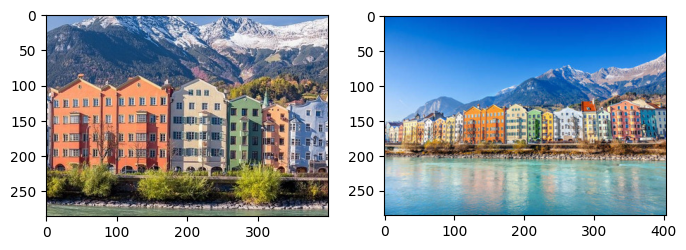

In [25]:
# Display Images
# Setting the plot figure as width 8 and hight 3
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.imshow(input1)

plt.subplot(1,2,2)
plt.imshow(input2)

In [27]:
# Read the image classes
with open("imagenet_classes.txt", "r") as f:
    img_classes = [s.strip() for s in f.readlines()]

print("Total Image Classes :{}".format(len(img_classes)))

print(img_classes[:5]) #displaying first five classes

Total Image Classes :1000
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


In [28]:
# transforming input1 image

filename1 = "input1.jpg"
input_image1 = Image.open(filename1)

preprocess1 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor1 = preprocess1(input_image1)
input_batch1 = input_tensor1.unsqueeze(0) # create a mini-batch as expected by the model

In [29]:
# transforming input2 image

filename2 = "input2.jpg"
input_image2 = Image.open(filename2)

preprocess2 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor2 = preprocess2(input_image2)
input_batch2 = input_tensor2.unsqueeze(0) # create a mini-batch as expected by the model

In [30]:
# model 1
model1 = models.densenet121(pretrained=True) # Optionally loads weights pre-trained on ImageNet.
model1.eval()  # sets the model in evaluation mode

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch1 = input_batch1.to('cuda')
    model1.to('cuda')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 49.9MB/s]


In [31]:
# model 2
model2 = models.densenet121(pretrained=True) # Optionally loads weights pre-trained on ImageNet.
model2.eval()  # sets the model in evaluation mode

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch2 = input_batch2.to('cuda')
    model2.to('cuda')

In [32]:
# 1
with torch.no_grad():
    output1 = model1(input_batch1)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output1.shape)

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities1 = torch.nn.functional.softmax(output1[0], dim=0)

torch.Size([1, 1000])


In [33]:
# 2
with torch.no_grad():
    output2 = model2(input_batch2)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output2.shape)

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities2 = torch.nn.functional.softmax(output2[0], dim=0)

torch.Size([1, 1000])


In [34]:
# Show top categories per image 1
k = 5
top5_prob1, top5_catid1 = torch.topk(probabilities1, k)

for id,prob in zip(top5_catid1,top5_prob1):
    print(f'Image class: {img_classes[id]}\t----- {prob * 100:.4f} %')

Image class: valley	----- 46.7852 %
Image class: alp	----- 21.1960 %
Image class: lakeside	----- 17.4623 %
Image class: castle	----- 5.3976 %
Image class: palace	----- 2.8569 %


In [35]:
# Show top categories per image 2
k = 5
top5_prob2, top5_catid2 = torch.topk(probabilities2, k)

for id,prob in zip(top5_catid2,top5_prob2):
    print(f'Image class: {img_classes[id]}\t----- {prob * 100:.4f} %')

Image class: lakeside	----- 75.3316 %
Image class: valley	----- 9.5997 %
Image class: seashore	----- 6.5148 %
Image class: alp	----- 2.2818 %
Image class: promontory	----- 0.6098 %


Image 1 Minimum, Maximum and Contrast is:  0 255 1.0
Image 1 Height, Width and Dimension count is:  (286, 400, 3)
Image 1 Type is:  <class 'tuple'>


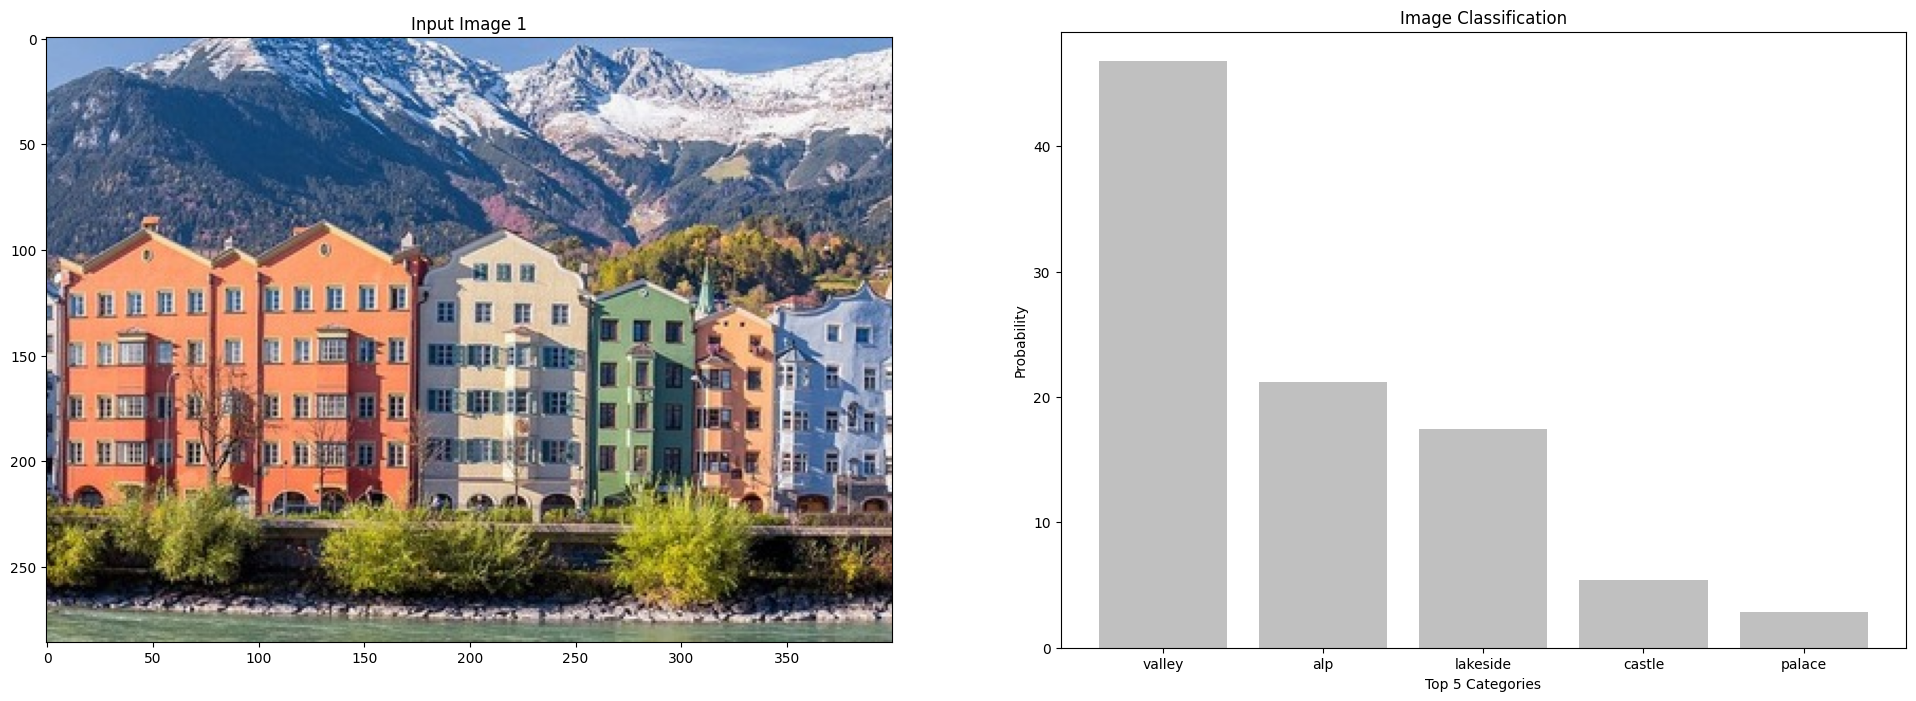

In [47]:
# plot result 1
import matplotlib.pyplot as plt

classes = [img_classes[id] for id in top5_catid1]
probabilities = [prob * 100 for prob in top5_prob1]
# creating the bar plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24, 8))
ax1.set_title('Input Image 1')
ax1.imshow(input_image1)

print("Image 1 Minimum, Maximum and Contrast is: ", min1,max1,contrast1) # image contrast
print("Image 1 Height, Width and Dimension count is: ", img1.shape) # image height, width, dimensions
print("Image 1 Type is: ", type(img1.shape)) # image type

ax2.bar(classes, probabilities, color="silver")
ax2.set_xlabel("Top 5 Categories" )
ax2.set_ylabel("Probability")
ax2.set_title("Image Classification")
plt.show()

Image 2 Minimum, Maximum and Contrast is:  0 255 1.0
Image 2 Height, Width and Dimension count is:  (286, 404, 3)
Image 2 Type is:  <class 'tuple'>


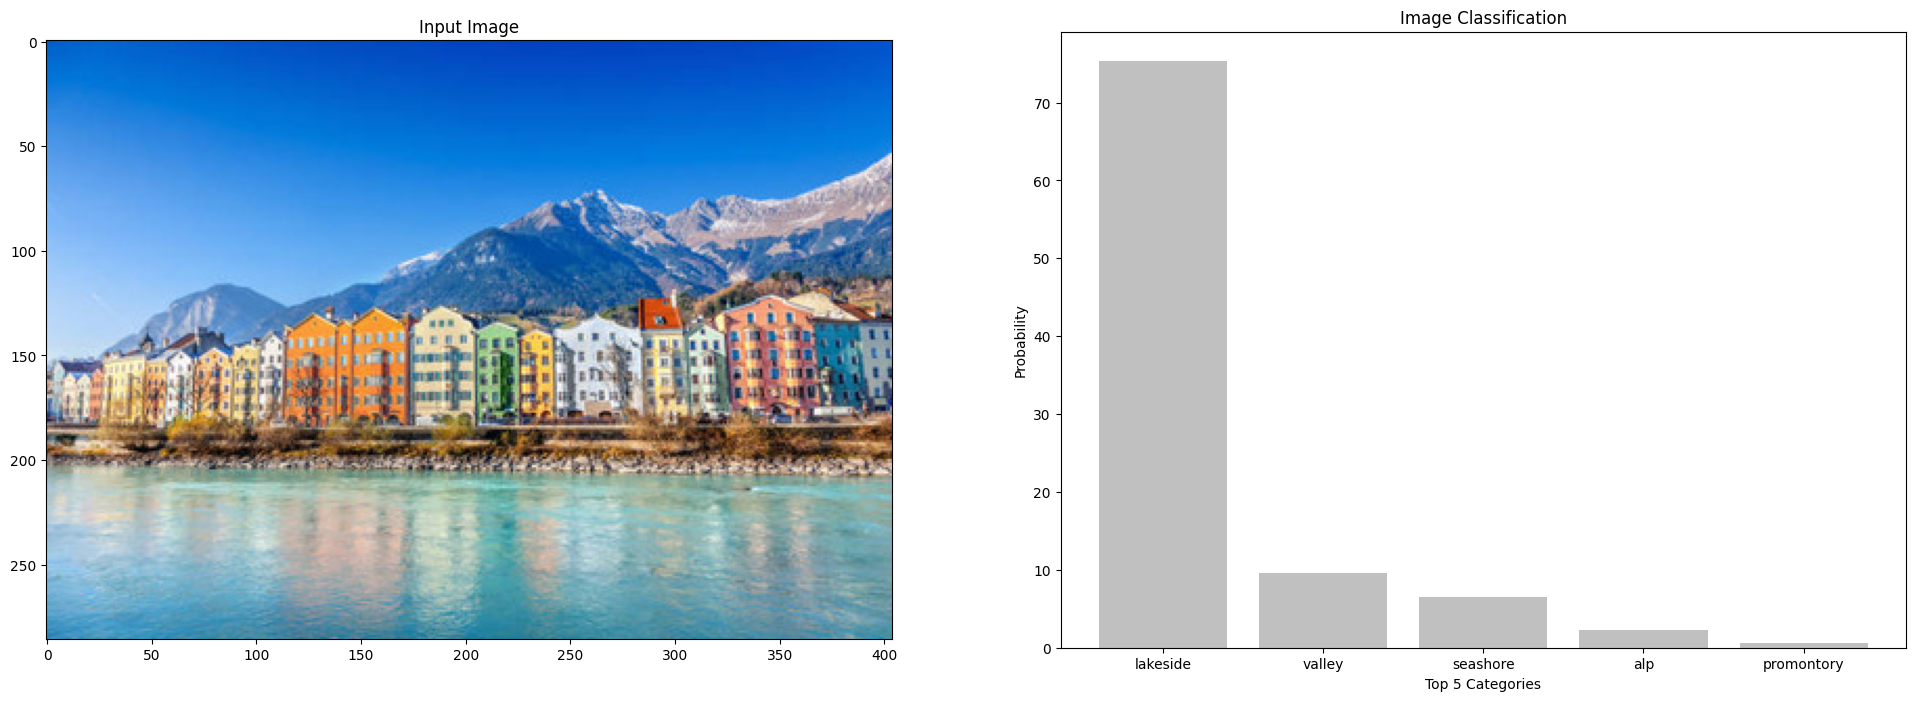

In [46]:
# plot result 2
import matplotlib.pyplot as plt

classes = [img_classes[id] for id in top5_catid2]
probabilities = [prob * 100 for prob in top5_prob2]
# creating the bar plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24, 8))
ax1.set_title('Input Image')
ax1.imshow(input_image2)

print("Image 2 Minimum, Maximum and Contrast is: ", min2,max2,contrast2)
print("Image 2 Height, Width and Dimension count is: ", img2.shape) # image height, width, dimensions
print("Image 2 Type is: ", type(img2.shape)) # image type

ax2.bar(classes, probabilities, color="silver")
ax2.set_xlabel("Top 5 Categories")
ax2.set_ylabel("Probability")
ax2.set_title("Image Classification")
plt.show()

In [ ]:
https://medium.com/intel-student-ambassadors/visual-sentiment-analysis-for-review-images-812eab7ef2b
https://www.itm-conferences.org/articles/itmconf/pdf/2022/04/itmconf_icacc2022_03029.pdf
https://en.wikipedia.org/wiki/ImageNet
https://blog.paperspace.com/popular-deep-learning-architectures-alexnet-vgg-googlenet/
https://medium.com/@evertongomede/exploring-googlenet-a-revolutionary-deep-learning-architecture-8bb176a0facc
https://github.com/bhimrazy/Image-Recognition-App-using-FastAPI-and-PyTorch/blob/main/Image_Classification_using_pre_trained_DenseNet_model_in%C2%A0PyTorch.ipynb
https://www.mdpi.com/2076-3417/12/3/1030
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/
https://www.researchgate.net/publication/282072489_Robust_Image_Sentiment_Analysis_Using_Progressively_Trained_and_Domain_Transferred_Deep_Networks
